### Importing necessary modules

In [1]:
import numpy as np
from fbprophet import Prophet
import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt #
%matplotlib inline #
import os #
import warnings #
warnings.filterwarnings('ignore') #
os.getcwd() #

UsageError: unrecognized arguments: #


#### Forecast interval 

User has to provide the value of **k**, which is the number of periods for which the forecasting is done with model.

In [103]:
k = 20 # Input parameter

### Loading airpassengers data

The classic Box & Jenkins airline data containing monthly totals of international airline passengers from 1949 to 1960.

In [3]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

df = pd.read_csv('AirPassengers.csv', parse_dates=[0] ,date_parser=parser) #index_col=0,
df.columns = ["ds","y"]
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


### Train test splitting

First **80%** of observations are included in train subset and last **20%** are in test subset. After measuring the performance of the model, model trainingis done on entire dataset.

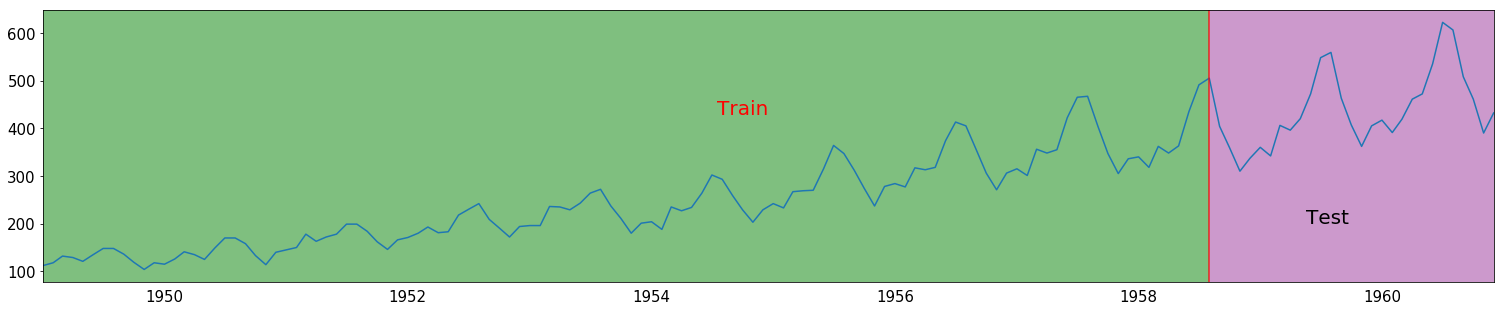

In [98]:
from pylab import figure, text, scatter, show
df_train = df.iloc[:int(df.shape[0]*0.80),:]
df_test = df.iloc[int(df.shape[0]*0.80):,:]
# plt.rcParams['figure.constrained_layout.use'] = True
fig, ax = plt.subplots(figsize=(26, 5),constrained_layout=False)
ax.margins(x=0)
ax.text(0.9, 0.2, 'Test',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
ax.text(0.5, 0.6, 'Train',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='red', fontsize=20)
ax.plot(df.set_index("ds"))
ax.axvspan(df["ds"][0], df["ds"][int(df.shape[0]*0.80)], facecolor='green', alpha=0.5)
ax.axvspan(df["ds"][int(df.shape[0]*0.80)], df["ds"].tolist()[-1], facecolor='purple', alpha=0.4)
ax.axvline(df["ds"][int(df.shape[0]*0.80)],0,500,color="red",alpha = 0.8)
ax.tick_params(top=False, bottom=False, left=True, right='off', labelleft=True, labelbottom=True,labelsize=15)
plt.show()

### Model fitting

Letus fit the model on training data. we added yearly seasonality (prophet needs seasonality to be expressed in days) and **US** holidays, as *AirPassengers* data is related to US.

In [99]:
m = Prophet()
m.add_seasonality(name='yearly', period=365, fourier_order=15)
m.add_country_holidays(country_name='US')
%time
m.fit(df_train)

C:\Users\Skoruz-User-4\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Found custom seasonality named "yearly", disabling built-in yearly seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Wall time: 0 ns


C:\Users\Skoruz-User-4\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


### Forecasting on test data

In [102]:
# test_future = m.make_future_dataframe(periods = df_test.shape[0])
test_future = df_test[["ds"]]
# np.c_[test_future.tail(),df[["ds"]].tail()]

test_forecast = m.predict(test_future)

### RMSE

In [11]:
# test_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
print("The RMSE of prophet is : ",sqrt(mean_squared_error(test_forecast["yhat"].values , df_test["y"].values)))

The RMSE of prophet is :  18.349911090475086


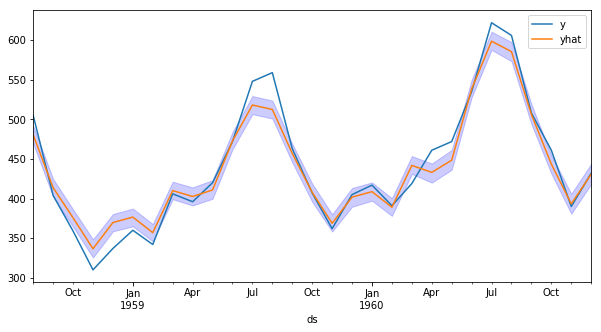

In [12]:
pd.concat([df_test.set_index('ds'),test_forecast[['ds','yhat']].set_index('ds')],axis=1).plot(figsize=(10,5))
plt.fill_between(df_test.set_index('ds').index, test_forecast['yhat_lower'], test_forecast['yhat_upper'], color='b', alpha=.2)
plt.show()

The test forecast data is as below

In [105]:
test_forecast_data = pd.concat([df_test.set_index('ds'),
                                test_forecast[['ds','yhat']].set_index('ds'),
                               test_forecast[['ds','yhat_lower']].set_index('ds'),
                               test_forecast[['ds','yhat_upper']].set_index('ds')],axis=1)
test_forecast_data.head()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
1958-08-01,505,480.383730,469.749429,490.969459
1958-09-01,404,413.687477,402.671336,424.377000
1958-10-01,359,375.676916,364.790368,386.823397
1958-11-01,310,336.642849,325.341837,346.845281
1958-12-01,337,369.721526,358.767389,380.521931


### Fit on entire data and make predictions

C:\Users\Skoruz-User-4\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Found custom seasonality named "yearly", disabling built-in yearly seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Skoruz-User-4\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\Skoruz-User-4\Anaconda3\lib\site-packages\matplotlib\figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is 

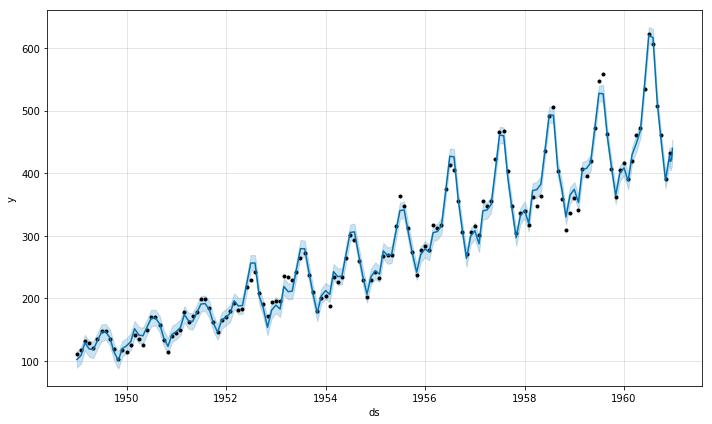

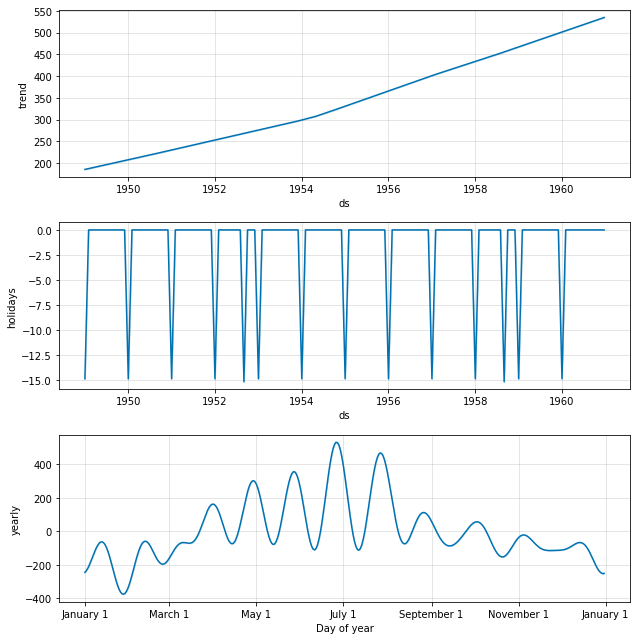

In [106]:
m = Prophet()
m.add_seasonality(name='yearly', period=365, fourier_order=15)
m.add_country_holidays(country_name='US')
m.fit(df)

future = m.make_future_dataframe(periods = k)
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

### --------------------------------------------------------------------------------------------------------